In [1]:
import numpy as np
import solvers
from tqdm.notebook import trange

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from mpl_toolkits import mplot3d


ModuleNotFoundError: ignored

In [ ]:
#Create a list of parameters to iterate through

#Global parameters:
L = 43
h = 1 # grid spacing
N_g = int(L/h)
N = 1 # Number of Particles
DatasetSize = 10
np.random.seed(42)
#Local Parameters
###
LocalParameterArray = np.zeros((4, DatasetSize))
#Generating Sizes
a_values = np.around(np.arange(0.1, 21.6,0.1), decimals = 1)
LocalParameterArray[0] = np.random.choice(a_values, size = DatasetSize)


#Generating Positions
#r = [rx, ry, N_g/2]
LocalParameterArray[2:] = np.random.randint(0, N_g, size = (2, DatasetSize))

#Generating Force amplitude
f_values = np.around(np.arange(0.1, 50.1,0.1), decimals = 1)
LocalParameterArray[1] = np.random.choice(f_values, size = DatasetSize)


parameters = {'h':h, 'Lx':L, 'Ly':L, 'Lz':L, 'N':N, 'N_g':N_g, 'indexingConvention':'ij' }
sim = solvers.Stokes3D(parameters)


In [ ]:
# vImages = np.zeros((3*DatasetSize, int(1+(L-1)/3),int(1+(L-1)/3)))
# vFlatImages = np.zeros((3*DatasetSize, int(1+(L-1)/3)**2))
# fImages = np.zeros((3*DatasetSize, int(1+(L-1)/3),int(1+(L-1)/3)))
# fFlatImages = np.zeros((3*DatasetSize, int(1+(L-1)/3)**2))

vImages = np.zeros((DatasetSize, int(1+(L-1)/3),int(1+(L-1)/3)))
v_train = np.zeros((DatasetSize, int(1+(L-1)/3)*int(1+(L-1)/3)))
fImages = np.zeros((DatasetSize, int(1+(L-1)/3),int(1+(L-1)/3)))
f_train = np.zeros((DatasetSize, int(1+(L-1)/3)*int(1+(L-1)/3)))

for i in trange(DatasetSize):

    a = LocalParameterArray[0][i]
    par_pl = int(N_g/2)
    r = np.array((LocalParameterArray[2][i], LocalParameterArray[3][i], sim.xx[par_pl]))
    F = np.array((0,0, LocalParameterArray[1][i]))
    sigma = a/(np.sqrt(3))
    sim.vUpdate(a, sigma, r, F)

    #Turns vx, vy and vz from a scalar to an array
    vx = np.array((sim.vx[:, par_pl, :].reshape(N_g, N_g)))
    vy = np.array((sim.vy[:, par_pl, :].reshape(N_g, N_g)))
    vz = np.array((sim.vz[:, par_pl, :].reshape(N_g, N_g)))

    #Slices F_x, F_y and F_z
    F_x = np.array((sim.F_x[:, par_pl, :].reshape(N_g, N_g)))
    F_y = np.array((sim.F_y[:, par_pl, :].reshape(N_g, N_g)))
    F_z = np.array((sim.F_z[:, par_pl, :].reshape(N_g, N_g)))

    #F_x =
    if i == 0:#Only calculate this the first time
        xx = np.array((sim.x[:, par_pl, :].reshape(N_g, N_g)))
        yy = np.array((sim.y[:, par_pl, :].reshape(N_g, N_g)))
        zz = np.array((sim.z[:, par_pl, :].reshape(N_g, N_g)))


    vImages[i,:] = np.sqrt(vx**2+vy**2+vz**2)[::3,::3]
    v_train[i,:] = np.sqrt(vx**2+vy**2+vz**2)[::3,::3].flatten()

    fImages[i,:] = np.sqrt(F_x**2+F_y**2+F_z**2)[::3,::3]
    f_train[i,:] = np.sqrt(F_x**2+F_y**2+F_z**2)[::3,::3].flatten()

    # fImages[i,:] = np.sqrt(sim.F_x**2+sim.F_y**2+sim.F_z**2)[::3,::3]
    # f_train[i,:] = np.sqrt(sim.F_x**2+sim.F_y**2+sim.F_z**2)[::3,::3].flatten()
    #Approach 1 - Store the proper image
    # vImages[3*i] = vx[::3,::3]
    # vImages[3*i +1] = vy[::3,::3]
    # vImages[3*i+2] = vz[::3,::3]

    # fImages[3*i] = F_x[::3,::3]
    # fImages[3*i +1] = F_y[::3,::3]
    # fImages[3*i+2] = F_z[::3,::3]



    #Approach 2 - Store the flattened Image
    # vFlatImages[3*i] = vx[::3,::3].flatten()
    # vFlatImages[3*i +1] = vy[::3,::3].flatten()
    # vFlatImages[3*i+2] = vz[::3,::3].flatten()


    # fFlatImages[3*i] = F_x[::3,::3].flatten()
    # fFlatImages[3*i +1] = F_y[::3,::3].flatten()
    # fFlatImages[3*i+2] = F_z[::3,::3].flatten()










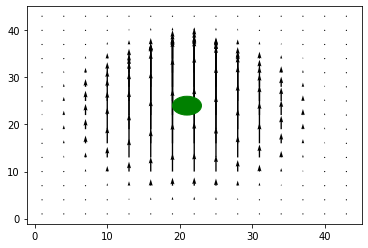

In [ ]:
xx = np.array((sim.x[:, par_pl, :].reshape(N_g, N_g)))
zz = np.array((sim.z[:, par_pl, :].reshape(N_g, N_g)))
F_x = np.array((sim.F_x[:, par_pl, :].reshape(N_g, N_g)))
F_z = np.array((sim.F_z[:, par_pl, :].reshape(N_g, N_g)))

fig = plt.figure();  ax = fig.add_subplot()

s_i=3
plt.quiver(xx[::s_i,::s_i], zz[::s_i,::s_i], F_x[::s_i,::s_i], F_z[::s_i,::s_i])

# plot the particle
circle1 = plt.Circle((r[0], r[1]), radius=2, color='green'); ax.add_patch(circle1)

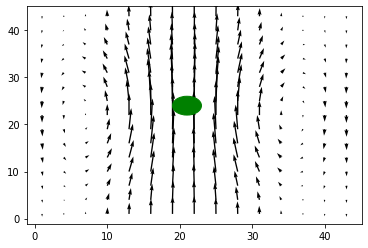

In [ ]:
vx, vy, vz = sim.vCalc(a, sigma, r, F)

vx = np.array((sim.vx[:, par_pl, :].reshape(N_g, N_g)))
vz = np.array((sim.vz[:, par_pl, :].reshape(N_g, N_g)))
xx = np.array((sim.x[:, par_pl, :].reshape(N_g, N_g)))
zz = np.array((sim.z[:, par_pl, :].reshape(N_g, N_g)))

fig = plt.figure();  ax = fig.add_subplot()

s_i=3
plt.quiver(xx[::s_i,::s_i], zz[::s_i,::s_i], vx[::s_i,::s_i], vz[::s_i,::s_i])

# plot the particle
circle1 = plt.Circle((r[0], r[1]), radius=2, color='green'); ax.add_patch(circle1)


In [ ]:
sim